In [4]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import warnings
warnings.filterwarnings("ignore")


In [5]:
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [8]:
search_term = "#GlobalWarming -filter:retweets" #enter  the hashtag here

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-02-14').items(1000) #no of tweets to be accessed

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [9]:
print(tweets_no_urls[0:5])

[u'Winter in London Hmm Me thinks there may be something in this global warming thingy london', u'Not saying GlobalWarming or ClimateChange isnt real What I am saying is cant we look at the possibility that', u'Im just going to leave this photo of a 19 degree February day in London here for people who dont believe in', u'A tale of two cities Paris amp NewYork spring winter weather globalwarming', u'The global cement industry emits the third largest amount of carbon dioxide in the world behind China and the US']


In [10]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]   #calculate polarity

(0.2,
 TextBlob("Not saying GlobalWarming or ClimateChange isnt real What I am saying is cant we look at the possibility that"))

In [11]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Winter in London Hmm Me thinks there may be something in this global warming thingy london']

In [12]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"]) #create dataframe

sentiment_df.head(10)

,polarity,tweet
0,0.000000,Winter in London Hmm Me thinks there may be so...
1,0.200000,Not saying GlobalWarming or ClimateChange isnt...
2,0.000000,Im just going to leave this photo of a 19 degr...
3,0.000000,A tale of two cities Paris amp NewYork spring ...
4,-0.133333,The global cement industry emits the third lar...
5,0.283333,Nope Im pretty terrified too gt Am I the only ...
6,0.600000,In 70 years I wonder if I will say to my grand...
7,0.358333,Tweets tell scientists how quickly we normaliz...
8,0.000000,Anytime we hear that X day is the hottest day ...
9,0.000000,Evidence for manmade GlobalWarming hits gold s...


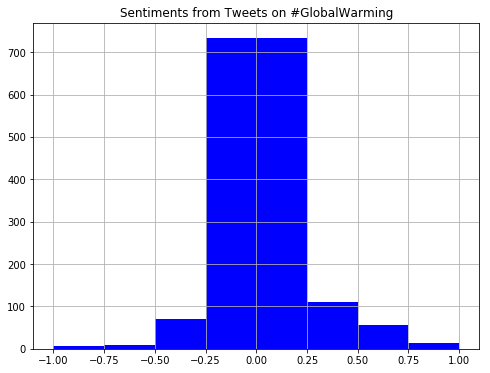

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on #GlobalWarming")
plt.show()

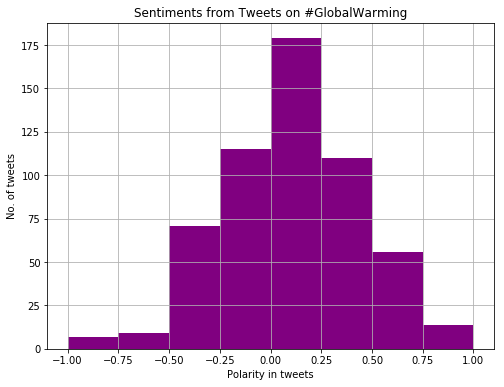

In [15]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

axes = plt.gca()



# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on #GlobalWarming")
plt.xlabel('Polarity in tweets')
plt.ylabel('No. of tweets')
plt.show()